## Room Occupance Analysis

Using Classification approaches like SVM and LDA

## About the data

Experimental data used for binary classification and composed by the following features:
- id: id of the sample
- date: time at format year-month-day hour:minute:second 
- Temperature: in Celsius 
- Relative Humidity: in % 
- Light: in Lux 
- CO2: in ppm 
- Humidity Ratio: Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
- Occupancy: 0 or 1 with 0 for not occupied and 1 for occupied status

In [291]:
import numpy as np
import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
import matplotlib.pyplot as plt # Matplot is a common Python lib for plotting
%matplotlib inline
import seaborn as sns # Seaborn is a great tool for data analysis graphs
from scipy import stats # Useful for correlation

Read the entire dataset provided using pandas

In [292]:
df = pd.read_csv("datatraining.csv")

Use of head() function to provide the first 5 lines of the dataset

In [293]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


A simple command to increase the maximum size of the output cells in the notebook

In [294]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Normalization is required in order to calculate Pearson correlation:

$$ z= \frac{X−\mu}{Xmax−Xmin} $$

In [295]:
classes = df["Occupancy"]
df.drop(["id", "date"], axis = 1, inplace = True)
df_norm = (df - df.mean()) / (df.max() -df.min())

Let's now analyze the relationship between occupancy and the continous variables.

We can use a pearson correlation coefficient to highlight the relationship between discrete variables and continous variables. If r is greater than about 0.3 this indicates good correlation and between 0.1 and 0.3 indicates a medium correlation.
To determine whether the correlation between variables is significant, compare the p-value to the significance level(~0.05). If p < significance level so the correlation indicates linear relationship.

In [296]:
r, p = stats.pearsonr(classes, df_norm['Temperature'])
print ('pearson correlation r between Occupancy and Temperature is %s with p = %s' %(r,p))
r, p = stats.pearsonr(classes, df_norm['Humidity'])
print ('pearson correlation r between Occupancy and Humidity is %s with p = %s' %(r,p))
r, p = stats.pearsonr(classes, df_norm['Light'])
print ('pearson correlation r between Occupancy and Light is %s with p = %s' %(r,p))
r, p = stats.pearsonr(classes, df_norm['CO2'])
print ('pearson correlation r between Occupancy and CO2 is %s with p = %s' %(r,p))
r, p = stats.pearsonr(classes, df_norm['HumidityRatio'])
print ('pearson correlation r between Occupancy and HumidityRatio is %s with p = %s' %(r,p))

pearson correlation r between Occupancy and Temperature is 0.538219693018 with p = 0.0
pearson correlation r between Occupancy and Humidity is 0.132964241777 with p = 1.93480878174e-33
pearson correlation r between Occupancy and Light is 0.907352114996 with p = 0.0
pearson correlation r between Occupancy and CO2 is 0.712235235717 with p = 0.0
pearson correlation r between Occupancy and HumidityRatio is 0.300281593913 with p = 2.61881866451e-169


We can also use boxplot to visualize the linear data relation.

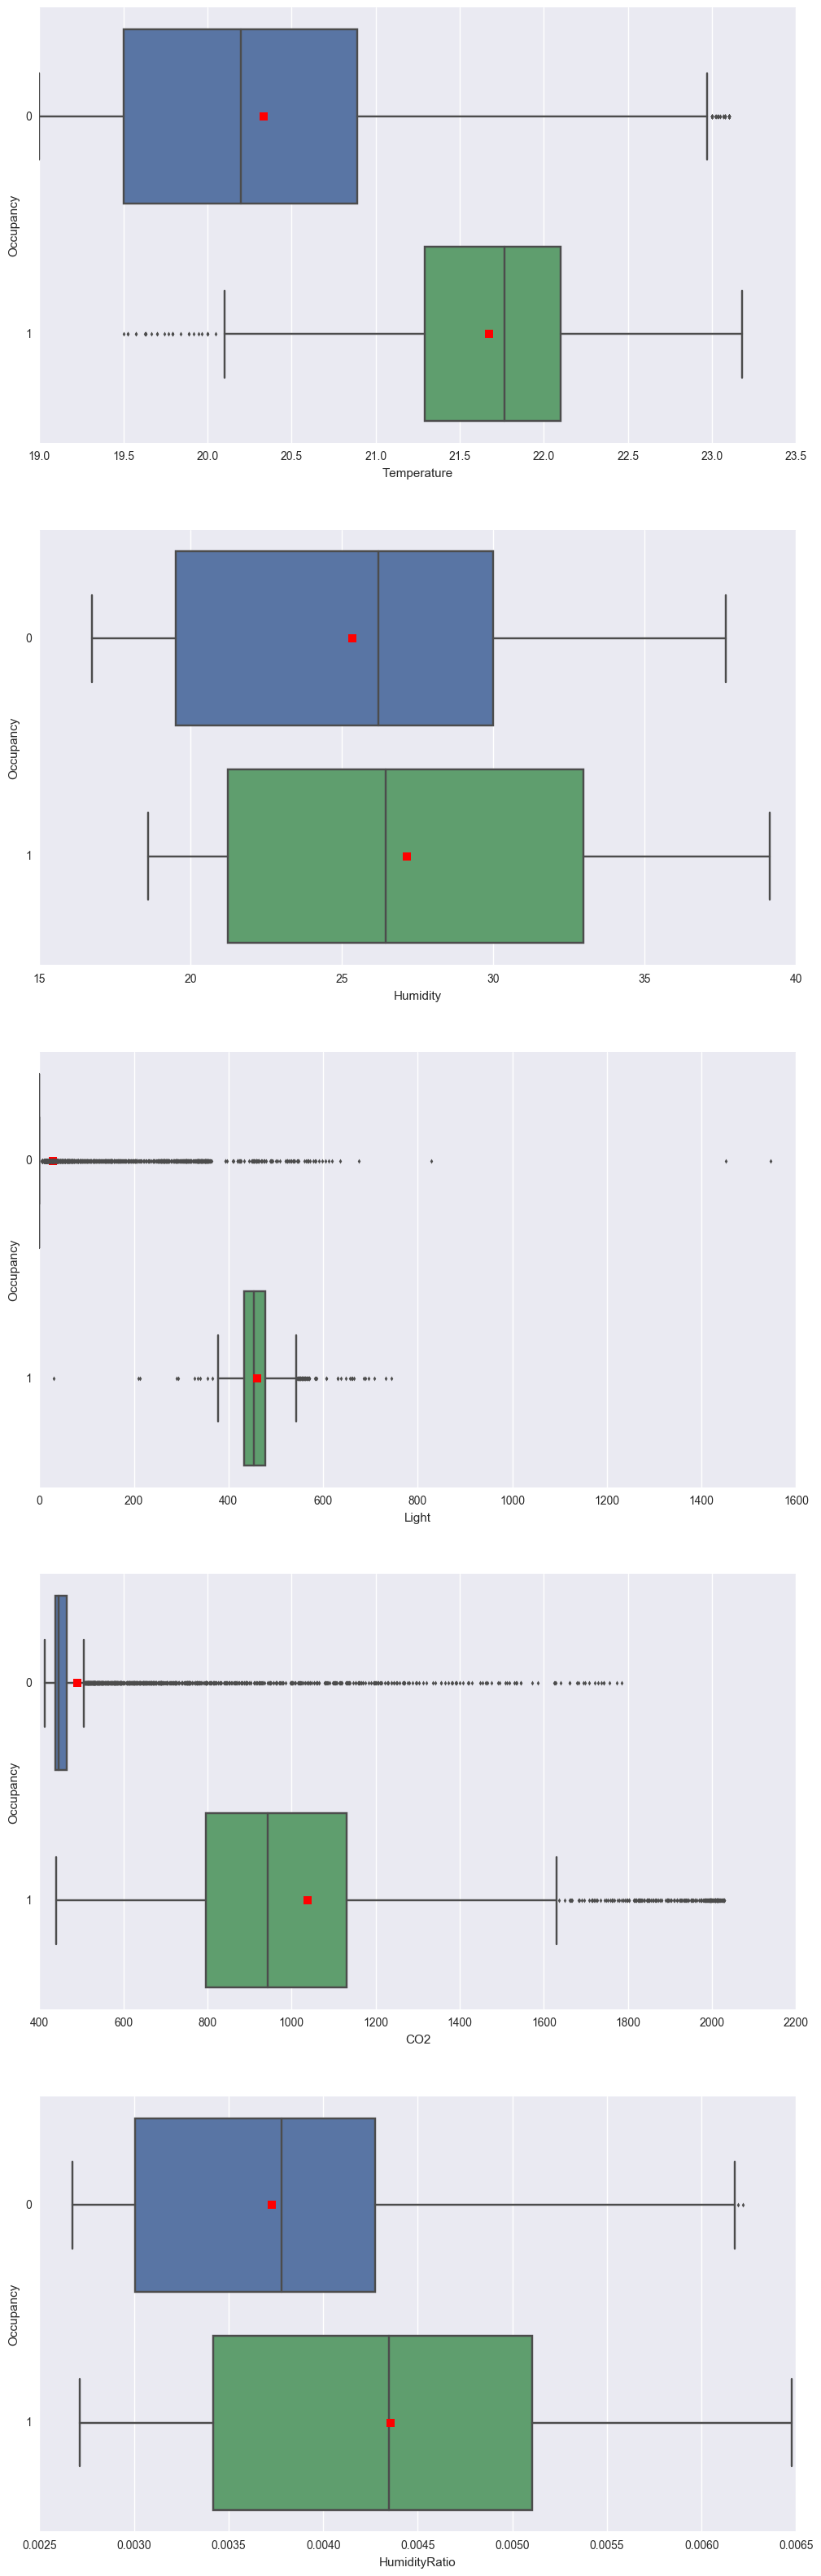

In [297]:
fig, axarr = plt.subplots(5, figsize=(12,40))
sns.boxplot(y = 'Occupancy', x = 'Temperature', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'Occupancy', x = 'Humidity', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'Occupancy', x = 'Light', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'Occupancy', x = 'CO2', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'Occupancy', x = 'HumidityRatio', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

Here, we will split the dataset randomly so that 70% of the total dataset will become our training dataset, and 30% will become our validation dataset, respectively.

In [298]:
from sklearn.model_selection import train_test_split
df.drop(["Occupancy"], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df, classes, test_size=0.30, random_state=123)

Note that since this a random assignment, check the relative frequencies for each class label:

In [299]:
print('Class label frequencies')
        
print('\nTraining Dataset:')    
for l in range(0,2):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))
    
print('\nValidation Dataset:')     
for l in range(0,2):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 0 samples: 79.25%
Class 1 samples: 20.75%

Validation Dataset:
Class 0 samples: 77.65%
Class 1 samples: 22.35%


### Standardization
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data.

Let's standardize features by removing the mean and scaling to unit variance:
$\mu = 0$ and $\sigma = 1$
where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean, so that the standard scores of the samples are calculated as follows:

$$ z = \frac{x - \mu}{\sigma}$$

In [300]:
X_train_stand = (X_train - X_train.mean()) / (X_train.std())
X_test_stand = (X_test - X_test.mean()) / (X_test.std())

### Normalization
Normalization also is very used in order to improve results and scale data from a small range:

$$ z= \frac{X−\mu}{Xmax−Xmin} $$

In [301]:
X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_test.min())
X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

## Linear SVM 

In [302]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train_stand, y_train) 
predicted_stand = clf.predict(X_test_stand)
clf.fit(X_train_norm, y_train) 
predicted_norm = clf.predict(X_test_norm)
print("\nAccuracy Standardization Training: " + str(np.mean(predicted_stand == y_test)))
print("\nAccuracy Normalization Training: " + str(np.mean(predicted_norm == y_test)))


Accuracy Standardization Training: 0.987720016373

Accuracy Normalization Training: 0.970937372084


## Linear Discriminant Analysis (LDA)

In [303]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_stand, y_train)
predicted_stand = clf.predict(X_test_stand)
lda.fit(X_train_norm, y_train)
predicted_norm = clf.predict(X_test_norm)
print("\nAccuracy Standardization Training: " + str(np.mean(predicted_stand == y_test)))
print("\nAccuracy Normalization Training: " + str(np.mean(predicted_norm == y_test)))


Accuracy Standardization Training: 0.958657388457

Accuracy Normalization Training: 0.970937372084


## GridSearch with cross-validation

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
'''

# Set the parameters by cross-validation
tuned_parameters = [
    #{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

#scores = ['precision']

#for score in scores:
#print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5)
                   #scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()
'''

'\n\n# Set the parameters by cross-validation\ntuned_parameters = [\n    #{\'kernel\': [\'rbf\'], \'gamma\': [1e-3, 1e-4],\'C\': [1, 10, 100, 1000]},\n                    {\'kernel\': [\'linear\'], \'C\': [1, 10]}]\n\n#scores = [\'precision\']\n\n#for score in scores:\n#print("# Tuning hyper-parameters for %s" % score)\nprint()\n\nclf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5)\n                   #scoring=\'%s_macro\' % score)\nclf.fit(X_train, y_train)\n\nprint("Best parameters set found on development set:")\nprint()\nprint(clf.best_params_)\nprint()\nprint("Grid scores on development set:")\nprint()\nmeans = clf.cv_results_[\'mean_test_score\']\nstds = clf.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n          % (mean, std * 2, params))\nprint()\n\nprint("Detailed classification report:")\nprint()\nprint("The model is trained on the full development set.")\nprint("The scores are 

## Datatest Accuracy using SVM and LDA

In [305]:
df_test = pd.read_csv("datatest.csv")
test_classes = df_test["Occupancy"]
df_test.drop(["id","date","Occupancy"], axis = 1, inplace = True)
df_test_norm = (df_test - df_test.mean()) / (df_test.max() - df_test.min())
 
predicted = clf.predict(df_test_norm)
print("\nAccuracy SVM Training: " + str(np.mean(predicted == test_classes)))
predicted = lda.predict(df_test_norm)
print("\nAccuracy LDA Training: " + str(np.mean(predicted == test_classes)))


Accuracy SVM Training: 0.968480300188

Accuracy LDA Training: 0.965478424015


## Datatest 2 Accuracy using SVM and LDA

In [306]:
df_test = pd.read_csv("datatest2.csv")
test_classes = df_test["Occupancy"]
df_test.drop(["id","date","Occupancy"], axis = 1, inplace = True)
df_test_norm = (df_test - df_test.mean()) / (df_test.max() - df_test.min())

predicted = clf.predict(df_test_norm)
print("\nAccuracy SVM Training: " + str(np.mean(predicted == test_classes)))
predicted = lda.predict(df_test_norm)
print("\nAccuracy LDA Training: " + str(np.mean(predicted == test_classes)))


Accuracy SVM Training: 0.992104183757

Accuracy LDA Training: 0.983695652174


## Challenge: ELM manually with cross-validation to choose best weights and number of hidden layours

In [310]:
class ELMClassifier():
    def __init__(self, n_hidden_units):
        self.n_hidden_units = n_hidden_units

    def fit(self, X, labels):
        X = np.column_stack([X, np.ones([X.shape[0], 1])])
        self.random_weights = np.random.randn(X.shape[1], self.n_hidden_units)
        G = np.tanh(X.dot(self.random_weights))
        self.w_elm = np.linalg.pinv(G).dot(labels)

    def predict(self, X):
        X = np.column_stack([X, np.ones([X.shape[0], 1])])
        G = np.tanh(X.dot(self.random_weights))
        return G.dot(self.w_elm)
    
    def hiddens(self):
        return self.n_hidden_units

In [320]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_absolute_error
TRAIN_MINS = {}
for N in range(45, 80, 1):
    TRAIN = {}
    for i in range(30):
        ELM = ELMClassifier(N)
        ELM.fit(X_train_norm, y_train)
        predicted = ELM.predict(X_test_norm)
        binarizer = LabelBinarizer(0, 1)
        binarizer.fit_transform(y_test)
        class_predictions = binarizer.inverse_transform(predicted)
        dict_train = {ELM:mean_absolute_error(class_predictions, y_test)}
        TRAIN[ELM] = mean_absolute_error(class_predictions, y_test)
    print(TRAIN)
    TRAIN_MINS[min(TRAIN.items(), key=lambda x: x[-1])[0]] = min(TRAIN.items(), key=lambda x: x[-1])[1]
elm = min(TRAIN_MINS.items(), key=lambda x: x[-1])[0]


df_test = pd.read_csv("datatest.csv")
test_classes = df_test["Occupancy"]
df_test.drop(["id","date","Occupancy"], axis = 1, inplace = True)
df_test_norm = (df_test - df_test.mean()) / (df_test.max() - df_test.min())
predicted = elm.predict(df_test_norm)
binarizer = LabelBinarizer(0, 1)
binarizer.fit_transform(test_classes)
class_predictions = binarizer.inverse_transform(predicted)

print("\nBest number hidden layers: " + str(elm.hiddens()))
print("\nAccuracy ELM Training: " + str(min(TRAIN_MINS.items(), key=lambda x: x[-1])))
print("\nAccuracy ELM DataTest: " + str(np.mean(class_predictions == test_classes)))

{<__main__.ELMClassifier object at 0x08651410>: 0.094146541137945156, <__main__.ELMClassifier object at 0x08698EB0>: 0.1223905034793287, <__main__.ELMClassifier object at 0x08698370>: 0.091281211625051165, <__main__.ELMClassifier object at 0x08651C70>: 0.082685223086369219, <__main__.ELMClassifier object at 0x08698770>: 0.05689725747032337, <__main__.ELMClassifier object at 0x086984D0>: 0.061809250920998773, <__main__.ELMClassifier object at 0x086980F0>: 0.054441260744985676, <__main__.ELMClassifier object at 0x08698FF0>: 0.054441260744985676, <__main__.ELMClassifier object at 0x08772630>: 0.22185837085550553, <__main__.ELMClassifier object at 0x08651970>: 0.14449447400736798, <__main__.ELMClassifier object at 0x086515B0>: 0.027015963978714697, <__main__.ELMClassifier object at 0x086989D0>: 0.23413835448219403, <__main__.ELMClassifier object at 0x08651690>: 0.12443716741711011, <__main__.ELMClassifier object at 0x08698230>: 0.10601719197707736, <__main__.ELMClassifier object at 0x08651